In [1]:
import pandas as pd
import gymnasium as gym

from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.planner import Planner
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.grid_search import GridSearch
from bettermdptools.utils.plots import Plots
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from bettermdptools.envs.cartpole_wrapper import CartpoleWrapper
from gymnasium.utils import seeding




c:\Users\ivann\anaconda3\envs\machine_learning_class\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import random

In [3]:
def set_seed(seed: int) -> None:
    """
    Set the seed for reproducibility.

    Parameters
    ----------
    seed : int
        The seed value to set.

    Returns
    -------
    None
    """
    global SEED
    SEED = seed
    os.environ["PYTHONHASHSEED"] = str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    seeding.np_random(SEED)

In [4]:
set_seed(30)

In [5]:
cart_env = gym.make('CartPole-v1', render_mode=None)
cartpole_10bins = CartpoleWrapper(cart_env, position_bins=10,
	velocity_bins=10,
	angular_velocity_bins=10,
	angular_center_resolution=0.1,
	angular_outer_resolution=0.5)

In [6]:
policy_V_10bin_gamma_25, policy_V_track_10bin_gamma_25, \
policy_pi_10bin_gamma_25 = Planner(cartpole_10bins.P).policy_iteration(gamma=0.25,
                                                                              n_iters=500,
                                                                              theta=1e-5)

policy_V_track_10bin_gamma_25_df = pd.DataFrame(np.trim_zeros(np.mean(policy_V_track_10bin_gamma_25, axis=1), 'b'))


In [7]:
policy_V_10bin_gamma_50, policy_V_track_10bin_gamma_50, \
policy_pi_10bin_gamma_50 = Planner(cartpole_10bins.P).policy_iteration(gamma=0.50,
                                                                              n_iters=500,
                                                                              theta=1e-5)

policy_V_track_10bin_gamma_50_df = pd.DataFrame(np.trim_zeros(np.mean(policy_V_track_10bin_gamma_50, axis=1), 'b'))

In [13]:
policy_V_10bin_gamma_99, policy_V_track_10bin_gamma_99, \
policy_pi_10bin_gamma_99 = Planner(cartpole_10bins.P).policy_iteration(gamma=0.99,
                                                                              n_iters=500,
                                                                              theta=1e-5)

policy_V_track_10bin_gamma_99_df = pd.DataFrame(np.trim_zeros(np.mean(policy_V_track_10bin_gamma_99, axis=1), 'b'))

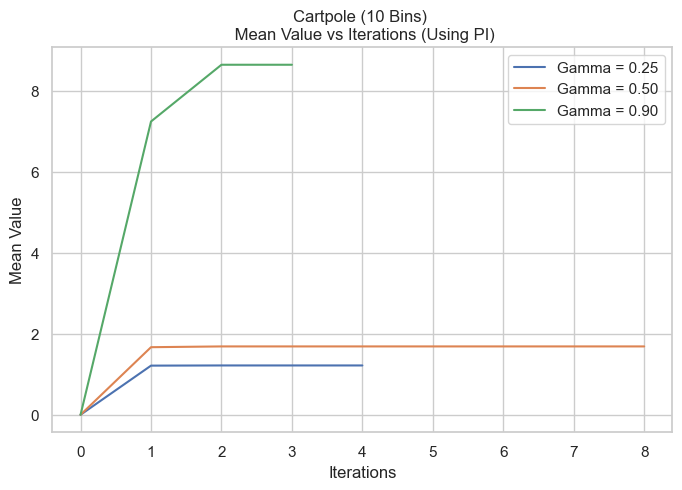

In [14]:
###Create plot to copare difference in Gamma divergence
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")
plt.plot(policy_V_track_10bin_gamma_25_df, label = 'Gamma = 0.25')
plt.plot(policy_V_track_10bin_gamma_50_df, label = 'Gamma = 0.50')
plt.plot(policy_V_track_10bin_gamma_99_df, label = 'Gamma = 0.90')
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.title("Cartpole (10 Bins) \n Mean Value vs Iterations (Using PI)")
plt.legend()

plt.show()


### Effect on Gamma on Value Iteration 

In [ ]:
vi_V_10bin_gamma_25, vi_V_track_10bin_gamma_25, \
vi_pi_10bin_gamma_25 = Planner(cartpole_10bins.P).value_iteration(gamma=0.25,
                                                                              n_iters=500,
                                                                              theta=1e-5)

vi_V_10bin_gamma_25_df = pd.DataFrame(np.trim_zeros(np.mean(vi_V_10bin_gamma_25, axis=1), 'b'))


In [ ]:
vi_V_10bin_gamma_50, vi_V_track_10bin_gamma_50, \
vi_pi_10bin_gamma_50 = Planner(cartpole_10bins.P).value_iteration(gamma=0.50,
                                                                              n_iters=500,
                                                                              theta=1e-5)

vi_V_10bin_gamma_50_df = pd.DataFrame(np.trim_zeros(np.mean(vi_V_10bin_gamma_50, axis=1), 'b'))


In [ ]:
vi_V_10bin_gamma_90, vi_V_track_10bin_gamma_90, \
vi_pi_10bin_gamma_90 = Planner(cartpole_10bins.P).value_iteration(gamma=0.90,
                                                                              n_iters=500,
                                                                              theta=1e-5)

vi_V_10bin_gamma_90_df = pd.DataFrame(np.trim_zeros(np.mean(vi_V_10bin_gamma_90, axis=1), 'b'))


In [ ]:
###Create plot to copare difference in Gamma divergence
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")
sns.lineplot(vi_V_10bin_gamma_25_df, x= 'Iteration', y = 'Mean Value', label = 'Gamma = 0.25')
sns.lineplot(vi_V_10bin_gamma_50_df, x= 'Iteration', y = 'Mean Value', label = 'Gamma = 0.50')
sns.lineplot(vi_V_10bin_gamma_90_df, x= 'Iteration', y = 'Mean Value', label = 'Gamma = 0.90')
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.title("Cartpole (10 Bins) \n Mean Value vs Iterations (Using VI)")
plt.legend()

plt.show()
